In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
df_young = pd.read_excel('young_premiums.xlsx')
df_young.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [ ]:
df_young.shape

(20096, 13)

In [ ]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [ ]:
df.shape

(20096, 14)

In [ ]:
#Check if both dataframes have same data

# Get common columns between both DataFrames
common_columns = df_young.columns.intersection(df.columns)

# Subset both DataFrames by the common columns
df_young_common = df_young[common_columns]
df_common = df[common_columns]

# Compare the DataFrames with the common columns
if df_young_common.equals(df_common):
    print("Both DataFrames have the same rows for the common columns.")
else:
    print("DataFrames have different rows in the common columns.")

Both DataFrames have the same rows for the common columns.


In [ ]:
## It's functionality is same as the above code cell

# # Sort both DataFrames by the common columns to ensure order doesn't affect comparison
# df_gr_sorted = df_gr_common.sort_values(by=common_columns.tolist()).reset_index(drop=True)
# df_sorted = df_common.sort_values(by=common_columns.tolist()).reset_index(drop=True)

# # Now check for any differences in rows
# if df_gr_sorted.equals(df_sorted):
#     print("Both DataFrames have the same rows after aligning columns.")
# else:
#     print("The DataFrames have different rows.")

# # Optionally, print the differences
# diff_gr = df_gr_sorted[~df_gr_sorted.apply(tuple, axis=1).isin(df_sorted.apply(tuple, axis=1))]
# diff_df = df_sorted[~df_sorted.apply(tuple, axis=1).isin(df_gr_sorted.apply(tuple, axis=1))]

# print("Rows present in df_gr but not in df:")
# print(diff_gr)

# print("Rows present in df but not in df_gr:")
# print(diff_df)


In [ ]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

## **Handle NA Values**

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,2
employment_status,1
income_level,4
income_lakhs,0


In [ ]:
null_columns = df.columns[df.isnull().sum() > 0]
null_columns_types = df[null_columns].dtypes

print(null_columns_types)

smoking_status       object
employment_status    object
income_level         object
dtype: object


In [ ]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace=True)
df['income_level'].fillna(df['income_level'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,0
employment_status,0
income_level,0
income_lakhs,0


In [ ]:
df.shape

(20096, 14)

## **Check for duplicates**

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20096.000000,20096.000000,20096.000000,20096.000000,20096.000000
mean,21.494029,0.718004,22.506519,8141.941033,2.503881
std,2.294050,0.940767,23.418644,2749.609551,1.710115
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,21.500000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


* In the 'age' column, the max age is 356 years which is definelty an outlier.

* In the 'numer_of_dependants' column the minum number of dependants is -3 which is not practically possible (there can be no dependants at all but there cannot be negative dependants), which is definetly an outlier

* In the 'income_lakhs' column, the min is 1 lakh, but max is 9.3 cr. This gives a skewed distribution.

So, these need to be handled.

In [ ]:
df[df.number_of_dependants<0].shape

(22, 14)

In [ ]:
#let us check the unique values for the above cell (where the number_of_dependants are <0)
df[df.number_of_dependants<0].number_of_dependants.unique()

array([-3, -1])

In [ ]:
#Converting the above rows that have negative value for number of dependants to positive value
df['number_of_dependants'] = df['number_of_dependants'].apply(lambda x: abs(x))

In [ ]:
df['number_of_dependants'].describe()

,number_of_dependants
count,20096.000000
mean,0.722582
std,0.937255
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


## **Exploratory Data Analysis**

### **Outleir treatment**

#### **1. 'age' column**


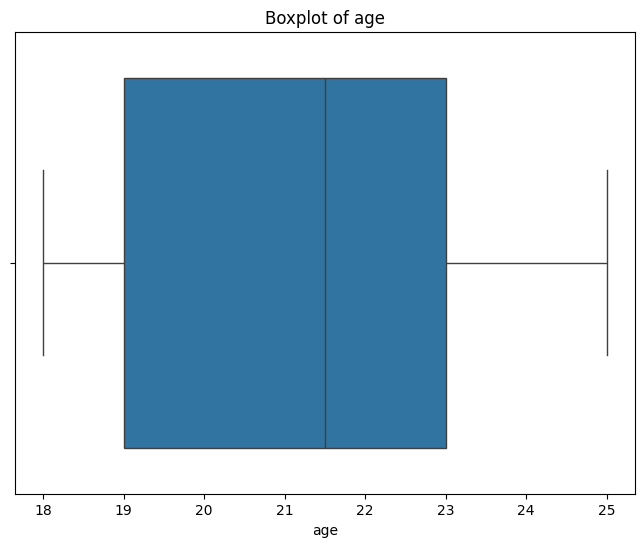

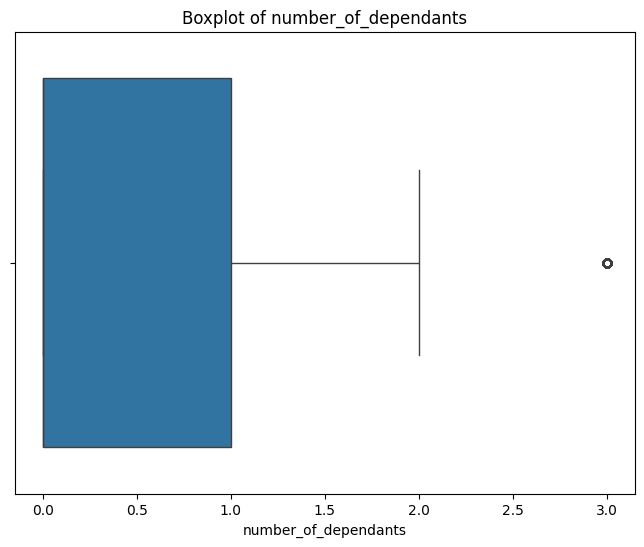

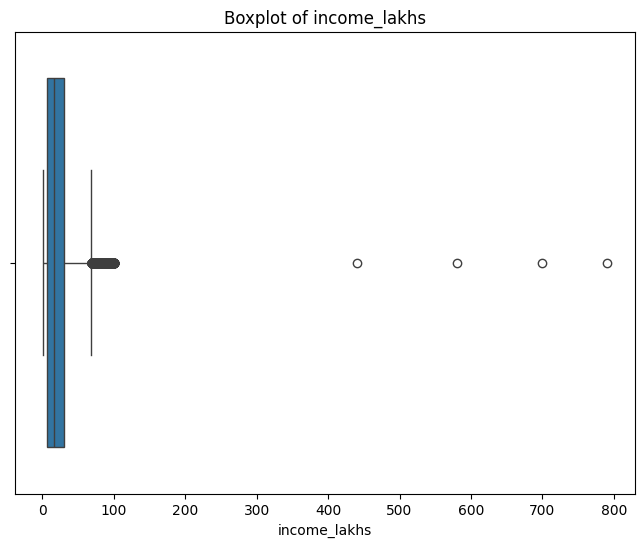

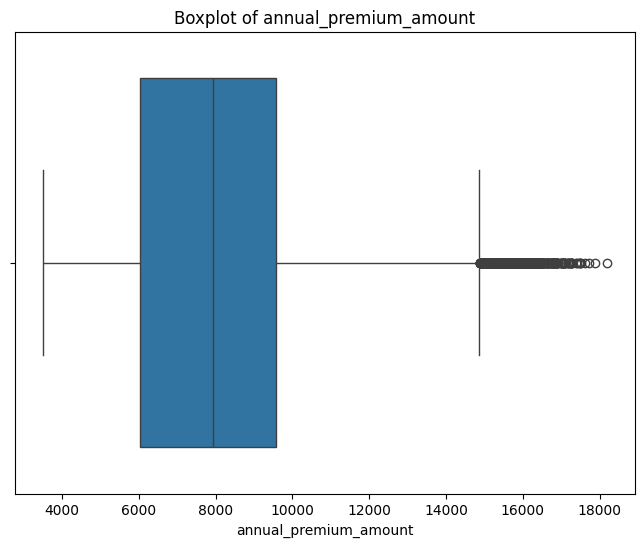

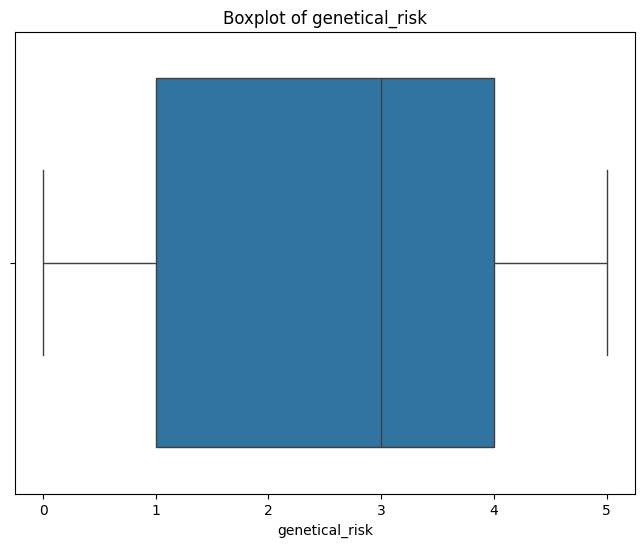

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numeric column
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
# Option 1: Include all the records that have age <=100 only
df = df[df['age'] <= 100]

# Calculate the IQR (Interquartile Range)
# Q1 = df['age'].quantile(0.25)
# Q3 = df['age'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# # Handle outliers (e.g., capping or removal)
# # Option 2: Capping
# df['age'] = np.clip(df['age'], lower_bound, upper_bound)

# Option 3: Removal (if appropriate)
# df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [ ]:
df['age'].describe()

,age
count,20096.000000
mean,21.494029
std,2.294050
min,18.000000
25%,19.000000
50%,21.500000
75%,23.000000
max,25.000000


#### **2. 'income_lakhs'**

<Axes: xlabel='income_lakhs', ylabel='Count'>

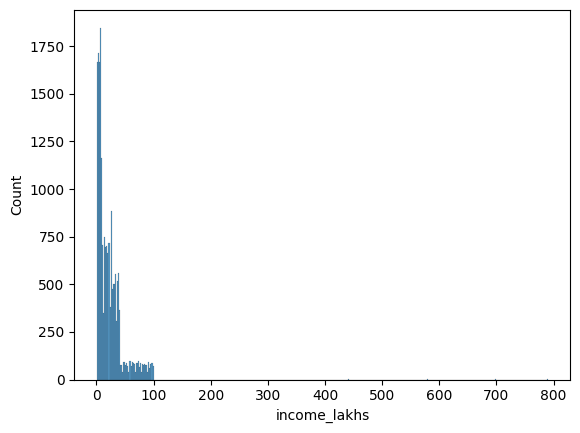

In [ ]:
sns.histplot(df['income_lakhs'])

In [ ]:
#Define a function and call IQR method to get IQR bounds
def iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [ ]:
iqr_bounds(df['income_lakhs'])

(-31.5, 68.5)

The lower bound is -29.0. The min is 1 lakh. So, this need not be handled. But the upper bound is 67.0 lakhs which is not very high salary. So, we will do some trial and error and talk to business stake holders what amount of income they want us to consider as upper bound. Here I am considering 1cr as upper bound.

#### **Find the quantile value that has 100.0 in income_lakhs value (1cr as income) as upper bound**

In [ ]:
# # find the quantile value that has 100.0 in income_lakhs value (1cr as income) as upper bound

# # First, sort the column
# sorted_income = df['income_lakhs'].sort_values()

# # Find the quantile where the value is 100.0
# quantile_value = df['income_lakhs'].quantile(q=sorted_income.searchsorted(100.0) / len(sorted_income))

# print(f"The quantile value for an upper bound of 100.0 in Income_Level is: {quantile_value}")

* searchsorted(100.0) finds the index position where 100.0 would be inserted to maintain order.

* Dividing by len(sorted_income) normalizes this index to the range [0, 1], which is what quantile expects.

* quantile(q=...) then gives the quantile corresponding to this normalized index.

This will give you the quantile in which 100.0 is the upper bound for income_lakhs column.

##### **OR THE BELOW CODE CAN ALSO BE USED**

In [ ]:
# Calculate the exact quantile for the value 100.0 in income_lakhs
quantile_value = df['income_lakhs'].rank(pct=True)[df['income_lakhs'] == 100.0].min()

print(f"The quantile value corresponding to an upper bound of 100.0 in income_lakhs is: {quantile_value}")

The quantile value corresponding to an upper bound of 100.0 in income_lakhs is: 0.9990296576433121


* rank(pct=True): This ranks the data in the income_lakhs column and normalizes it to a percentage (0 to 1 scale).

* df['income_lakhs'] == 100.0: This condition finds the positions in the DataFrame where the value is exactly 100.0.

* .min(): If there are multiple occurrences of 100.0, .min() returns the smallest rank (i.e., the lowest quantile) where 100.0 appears.

This method will give us the correct quantile where 100.0 is the upper bound in our income_lakhs data.

In [ ]:
quantile_threshold = df['income_lakhs'].quantile(quantile_value)
quantile_threshold

100.0

In [ ]:
df[df.income_lakhs > quantile_threshold]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1677,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636,3
4311,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888,5
4661,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424,3
6251,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586,0


In [ ]:
df[df.income_lakhs > quantile_threshold].shape

(4, 14)

There are just 10 records that are above threshold. These can either be dropped or imputation (like mean and median) can be performed on the data.

In [ ]:
## The code to perform imputation is here
# median_income = df['income_lakhs'].median()
# df.loc[df['income_lakhs'] > quantile_threshold, 'income_lakhs'] = median_income

In [ ]:
## Just dropping those 10 records
df = df[df['income_lakhs'] <= quantile_threshold]
df['income_lakhs'].describe()

,income_lakhs
count,20092.000000
mean,22.386074
std,21.730569
min,1.000000
25%,6.000000
50%,16.000000
75%,31.000000
max,100.000000


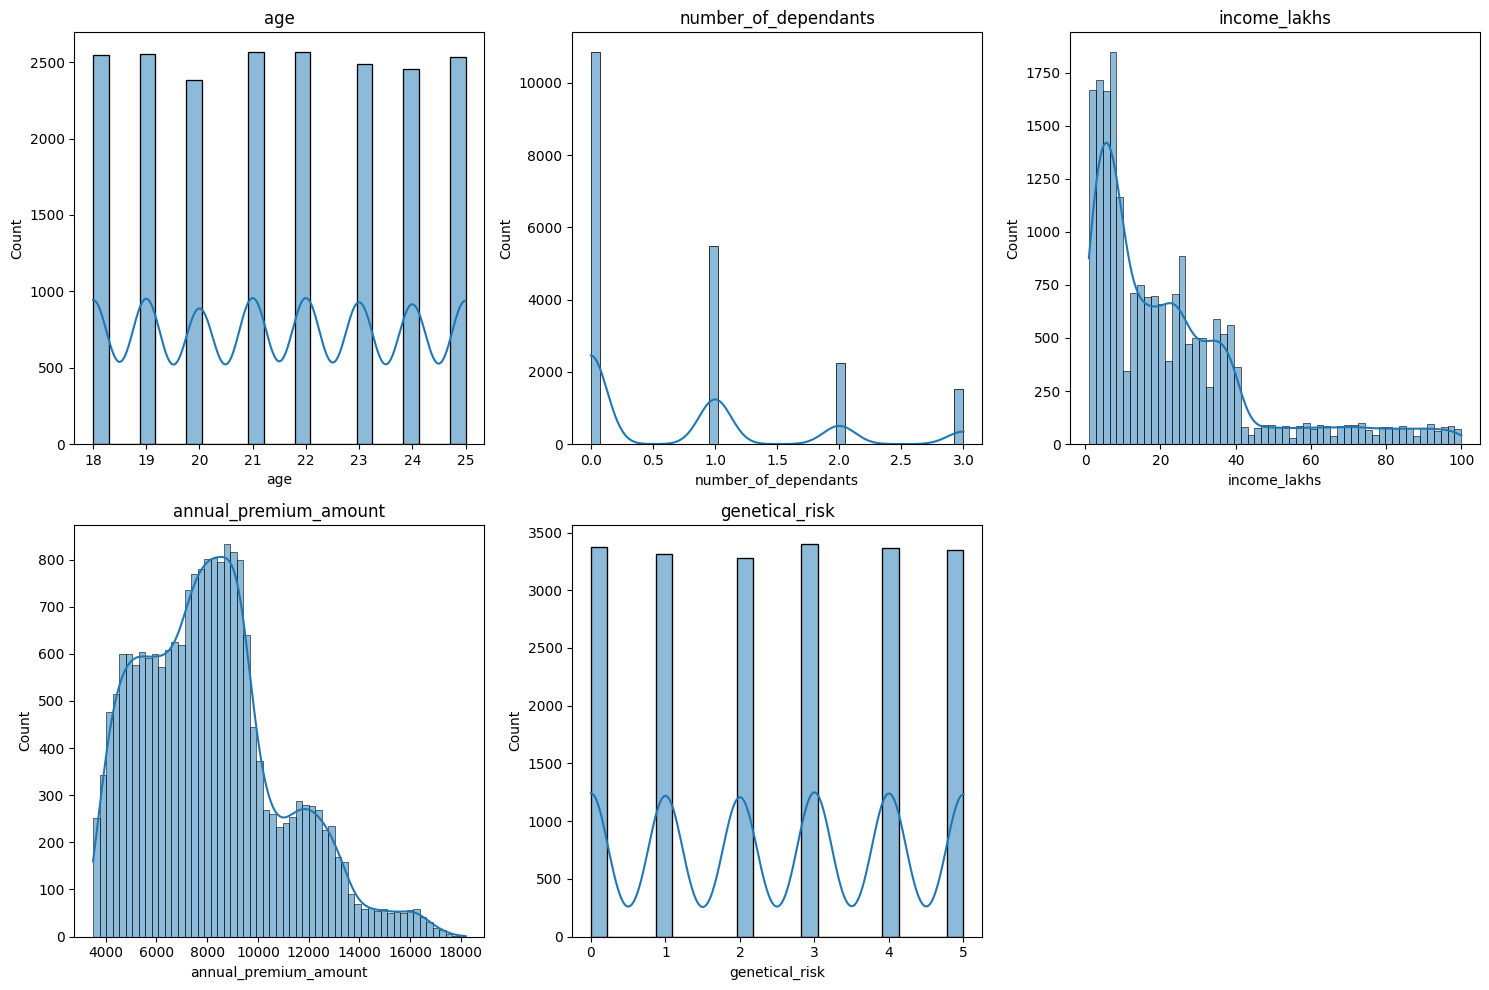

In [ ]:
#hist plot on numeric data
numeric_cols = df.select_dtypes(include=np.number).columns
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10))

for i, col in enumerate(numeric_cols):
  ax = axs[i//3, i%3]
  sns.histplot(df[col], ax=ax, kde=True)
  ax.set_title(col)

# If the last subplot axis is unused, it can turned off
if len(numeric_cols) % 3 != 0:
  for j in range(len(numeric_cols), 6):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

It can be seen that genetical_risk is spread across the age group 18-25

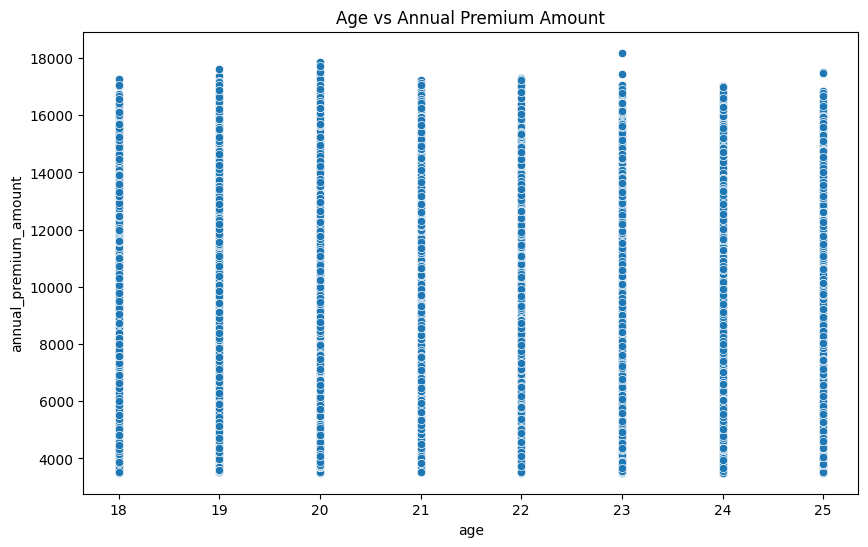

In [ ]:
#Scatterplot to see the relation between age and annual_premium_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='annual_premium_amount', data=df)
plt.title('Age vs Annual Premium Amount')
plt.show()

As age increases, the annual_premium_amount increases.

In [ ]:
#Correlation between age and annual_premium_amount
df[['age', 'annual_premium_amount']].corr()

,age,annual_premium_amount
age,1.000000,-0.010901
annual_premium_amount,-0.010901,1.000000


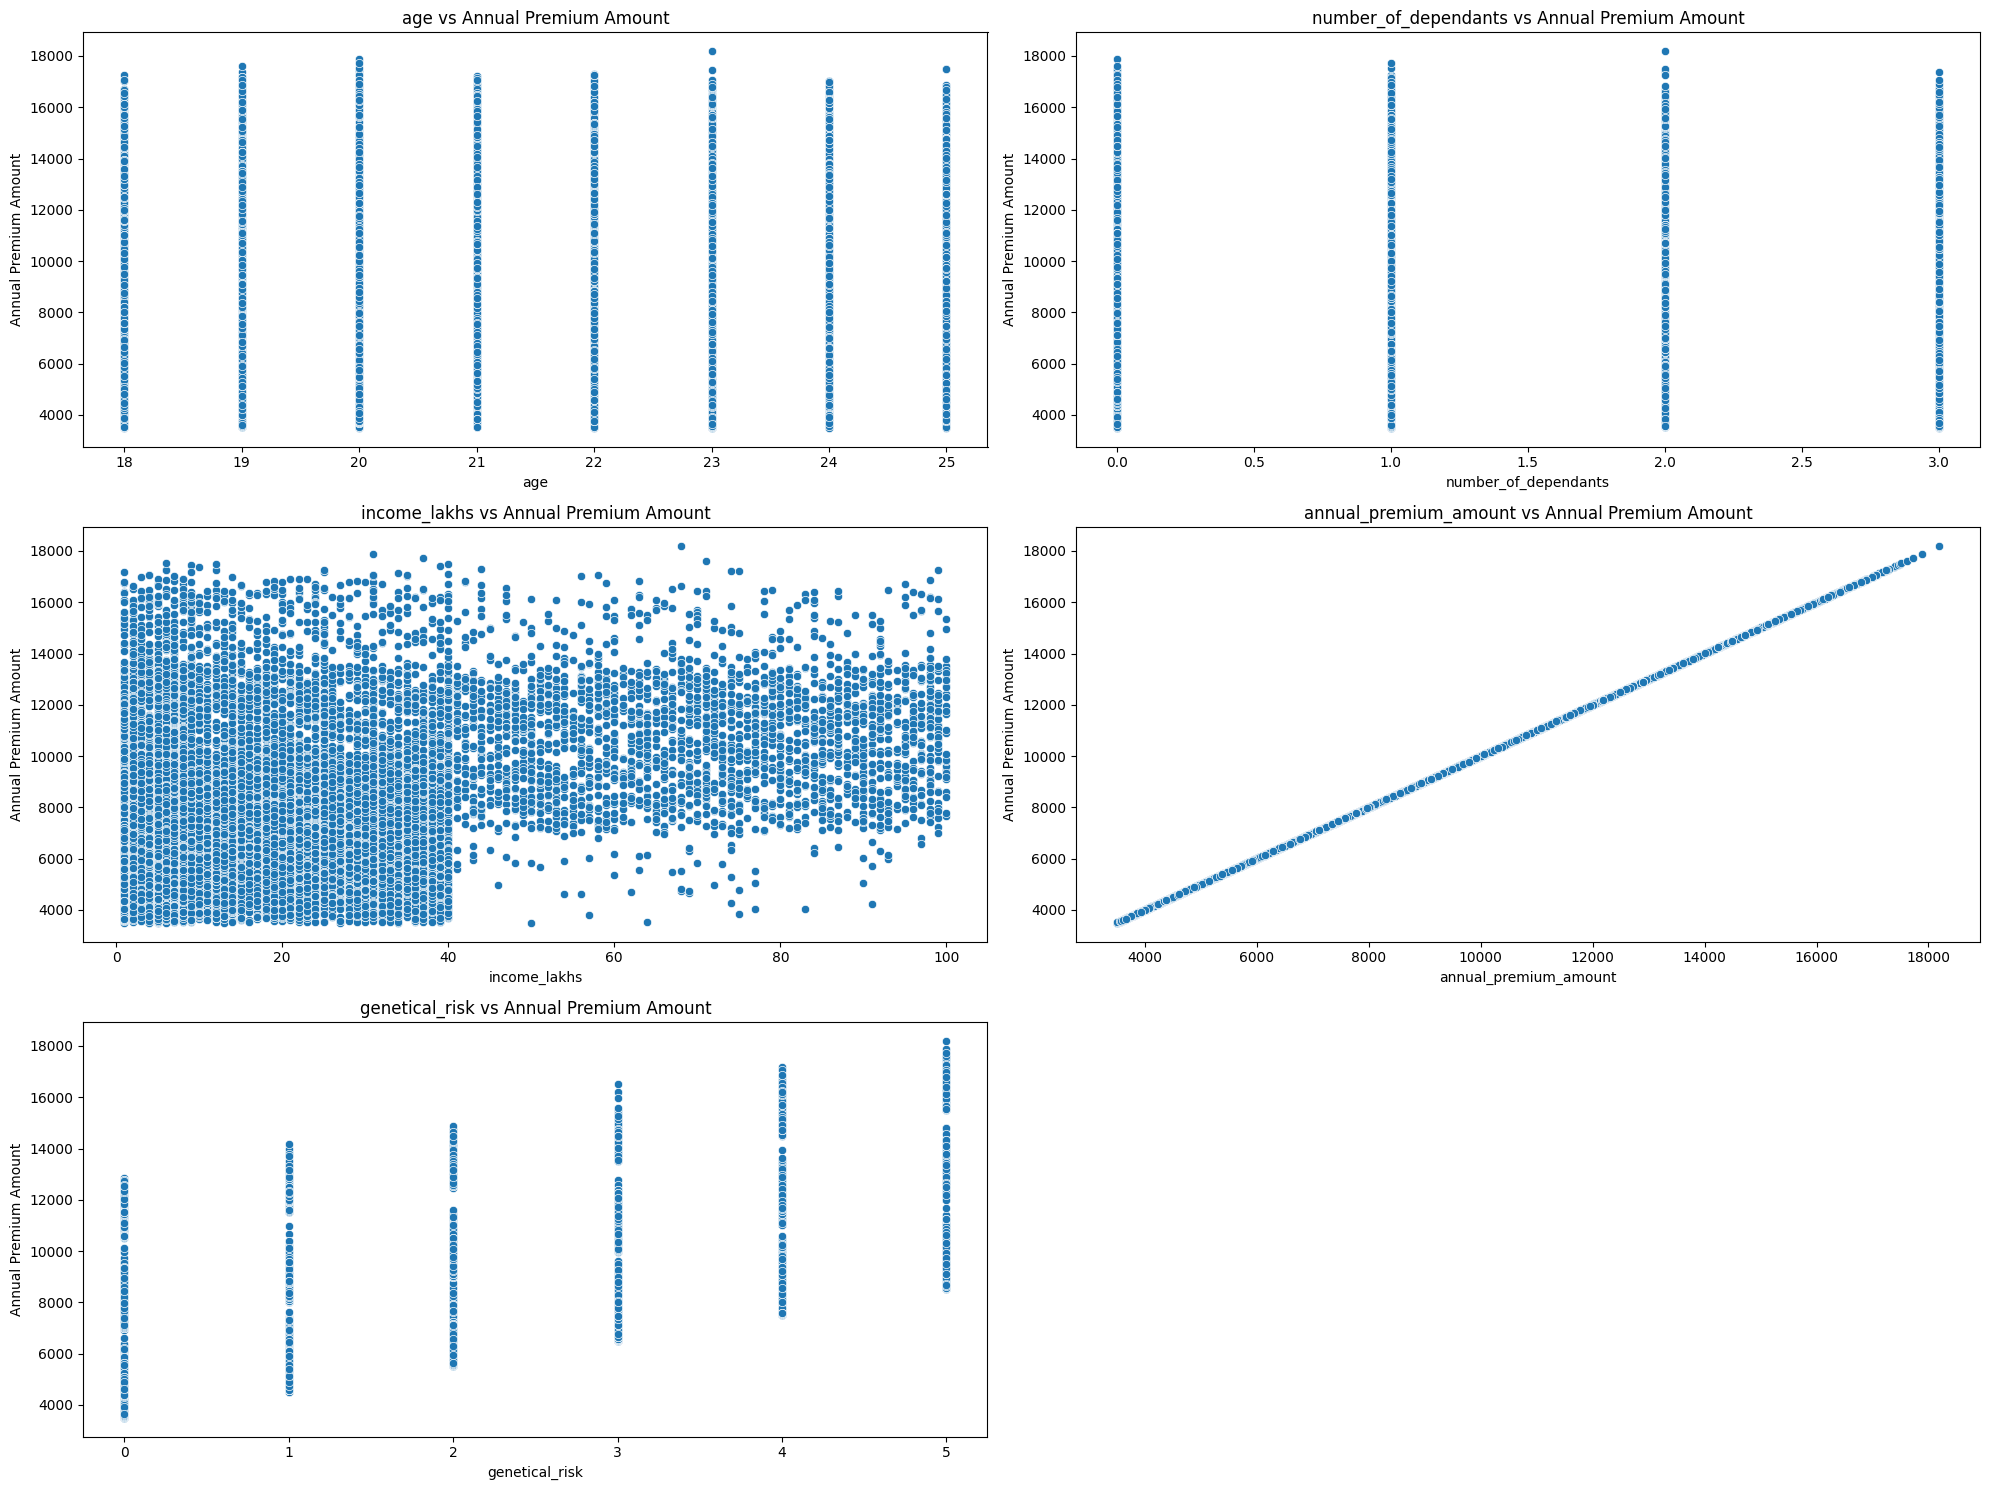

In [ ]:
#For loop for all numeric columns vs annual_premium_amount scatter plot with subplots

# Number of columns per row
n_cols = 2
# Calculate the number of rows needed
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots with the calculated number of rows and columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the 1D array of axes if there are more than one row
if n_rows > 1:
  axs = axs.flatten()

# Loop through each column in the DataFrame

for ax, col in zip(axs, numeric_cols):
  sns.scatterplot(x=col, y='annual_premium_amount', data=df, ax=ax)
  ax.set_title(f'{col} vs Annual Premium Amount')
  ax.set_xlabel(col)
  ax.set_ylabel('Annual Premium Amount')

# Remove any empty subplots if there are fewer columns than rows
for ax in axs[len(numeric_cols):]:
  fig.delaxes(ax)

plt.tight_layout()
plt.show()

**genetical_risk vs. annual_premium_amount:**

As the gentical_risk increase the annual premium amount also increases.


'age', 'income_lakhs' and 'annual_premium_amount' are right skewed.

In [ ]:
#Get categorical columns and print unique values in each of those columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


smoking_status: ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking'] has 'Smoking=0' 'Does Not Smoke'
 'Not Smoking' values which means 'No Smoking'. This has to be handled.

In [ ]:
df['smoking_status'].replace({'Smoking=0': 'No Smoking',
                              'Does Not Smoke': 'No Smoking',
                              'Not Smoking':'No Smoking'},
                             inplace=True)

df['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [ ]:
df['gender'].value_counts(normalize = True)

,proportion
gender,
Male,0.550368
Female,0.449632


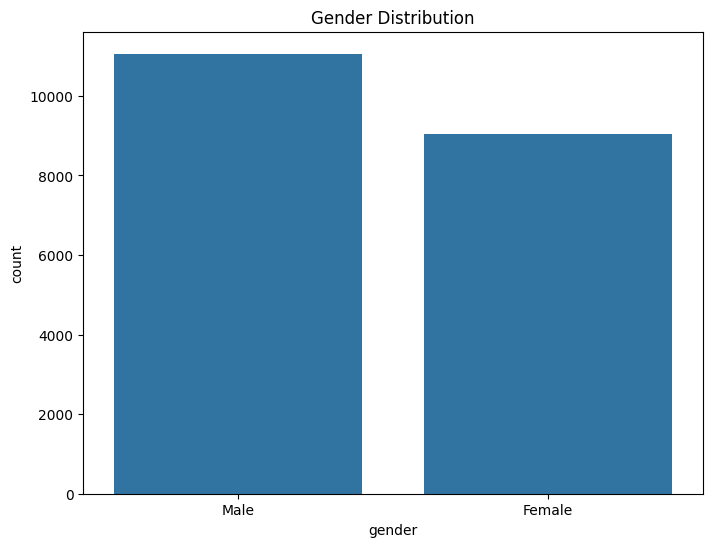

In [ ]:
#Plot bar chart for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

<ipython-input-42-f97c5b41dfaf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f97c5b41dfaf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f97c5b41dfaf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f97c5b41dfaf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f97c5b41dfaf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f97c5b41dfaf>:9: UserWarning: FixedFormatter should 

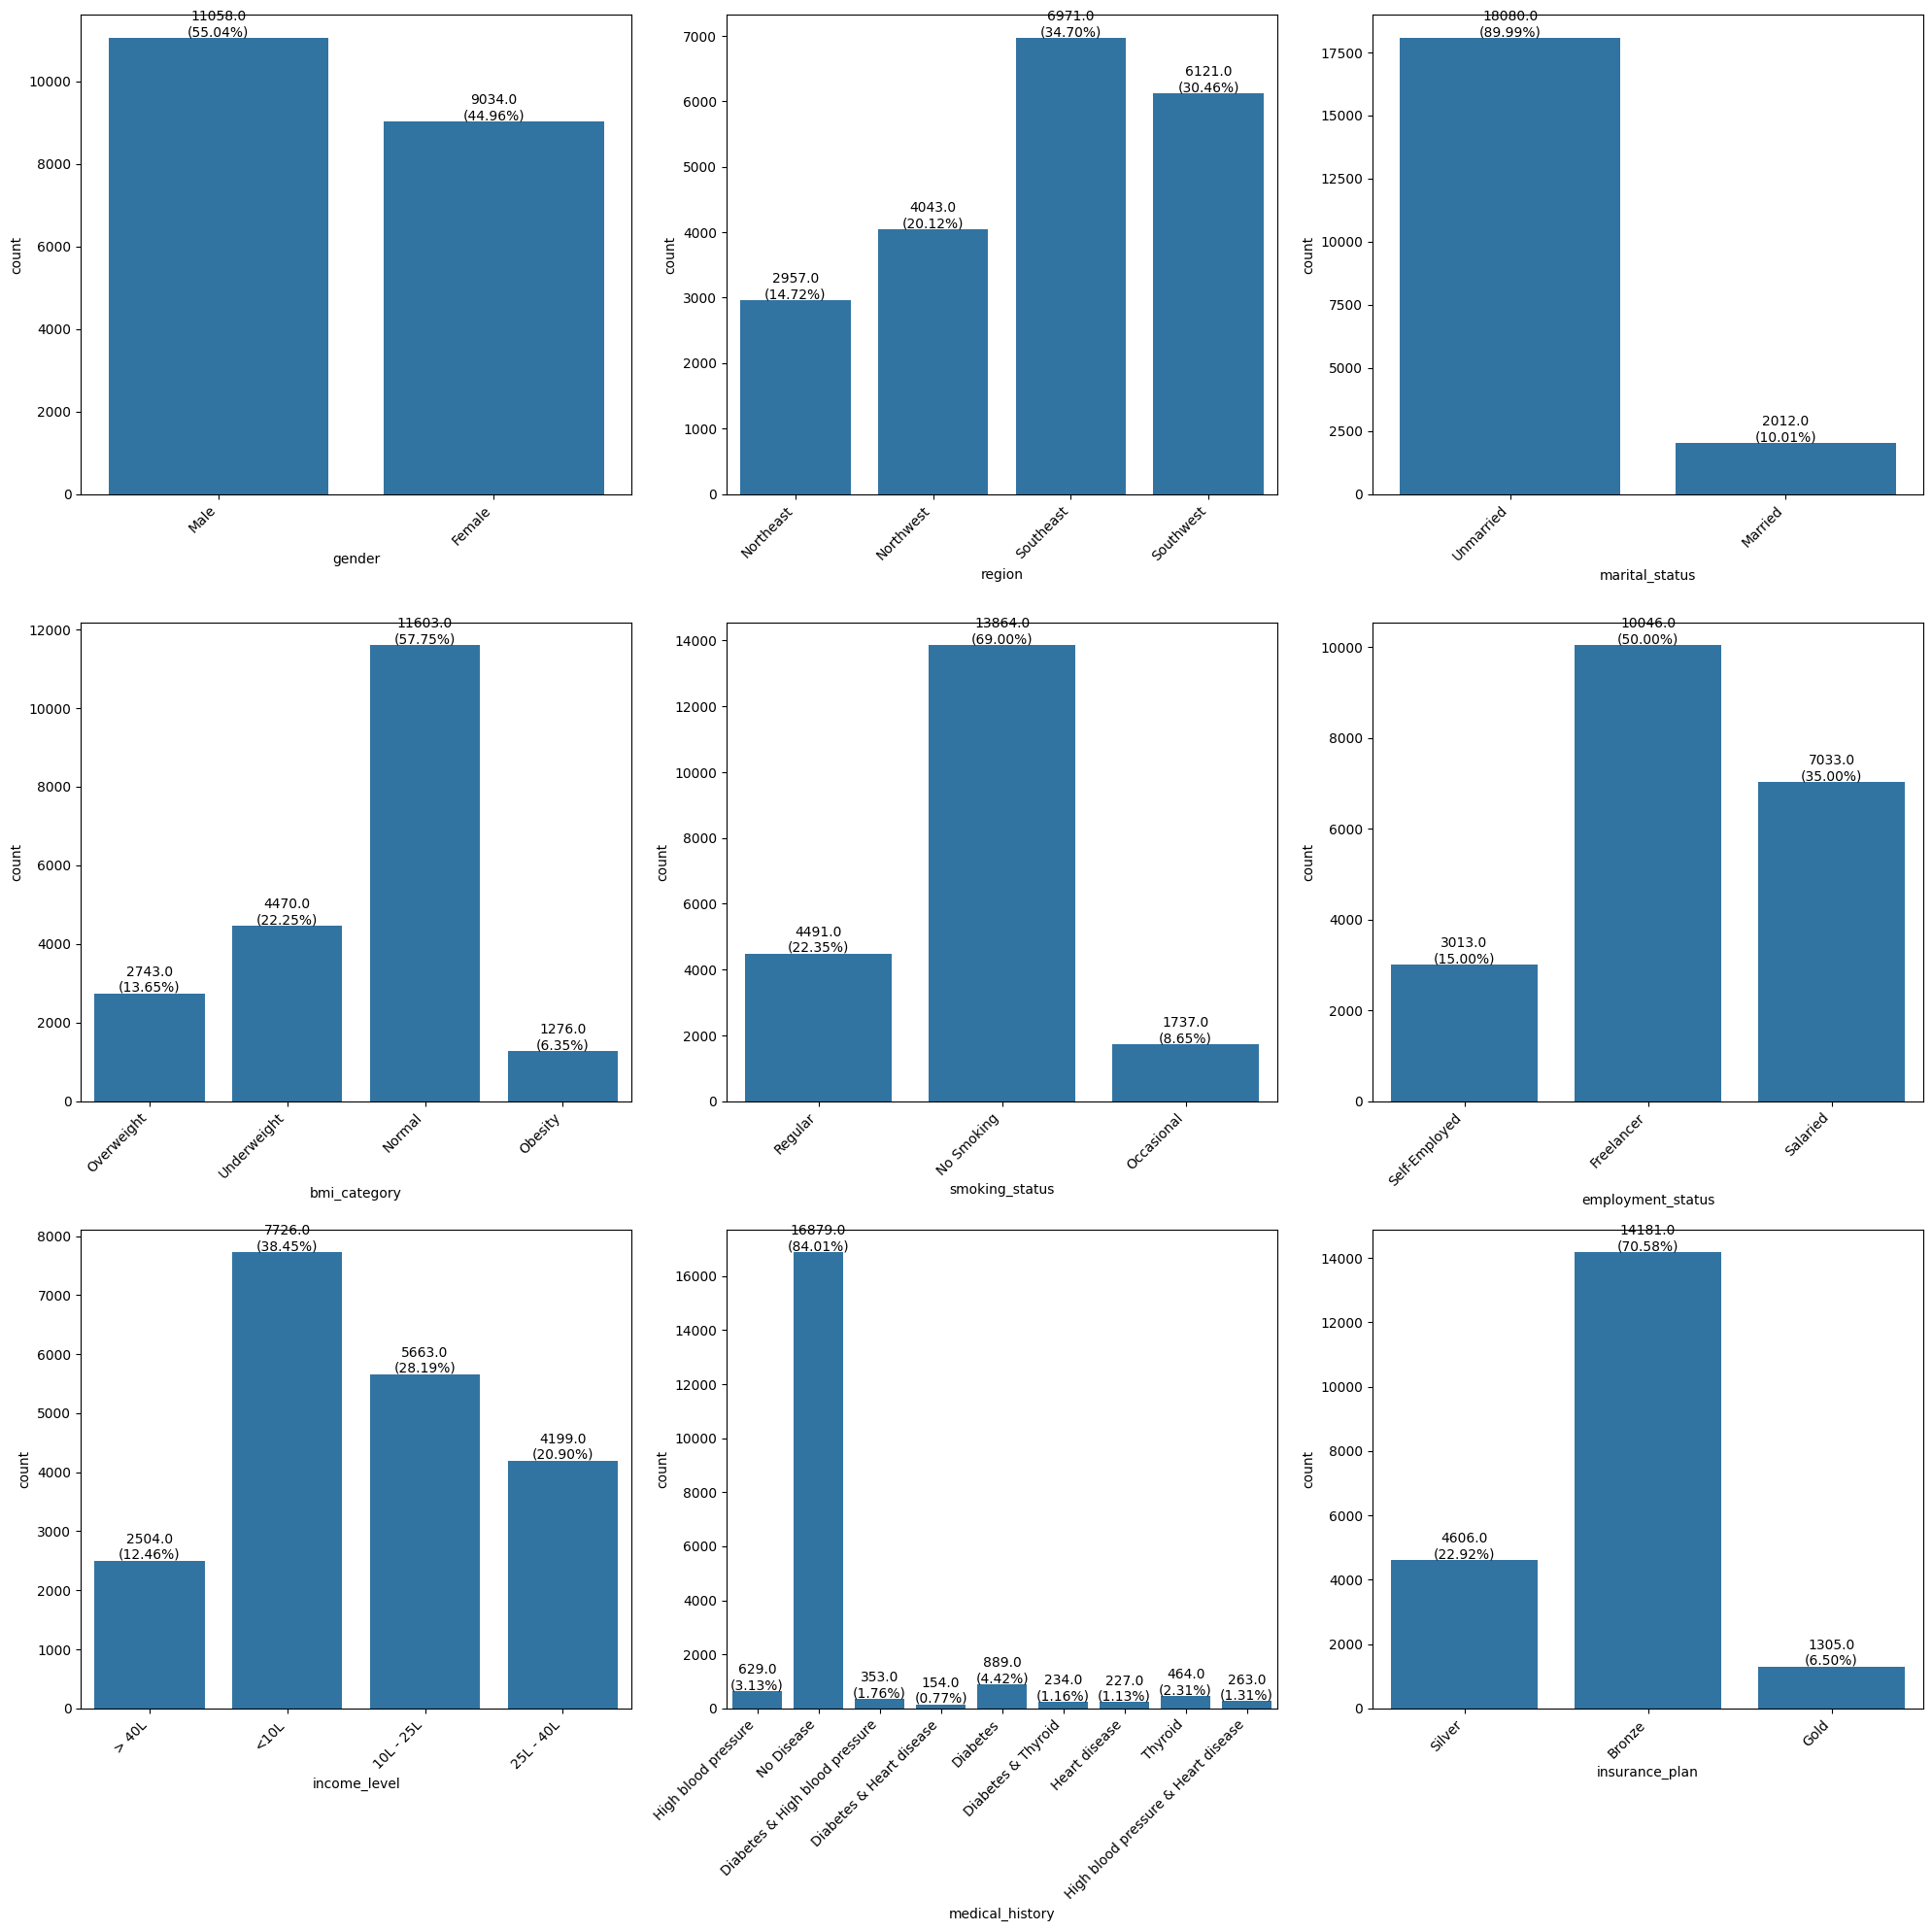

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()

# Rotate labels and plot bar chart with count and percentages in it
for i, col in enumerate(categorical_cols):
  counts = df[col].value_counts()
  percentages = counts / counts.sum()
  sns.countplot(x=col, data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
  for p in axs[i].patches:
    axs[i].annotate(f'{p.get_height()}\n({100*p.get_height()/len(df):.2f}%)',
     (p.get_x()+p.get_width()/2., p.get_height()), ha='center',
                    va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

# for i, col in enumerate(categorical_cols):
#   sns.countplot(x=col, data=df, ax=axs[i])
#   axs[i].set_title(f'Distribution of {col}')
#   axs[i].set_xlabel(col)
#   axs[i].set_ylabel('Count')

# plt.tight_layout()
# plt.show()


In [ ]:
#Based on income_level, what kind of insurance plan people are getting
df.groupby('income_level')['insurance_plan'].value_counts(normalize = True)

income_level  insurance_plan
10L - 25L     Bronze            0.796221
              Silver            0.146212
              Gold              0.057567
25L - 40L     Bronze            0.805430
              Silver            0.144796
              Gold              0.049774
<10L          Bronze            0.799249
              Silver            0.148460
              Gold              0.052291
> 40L         Silver            0.807907
              Gold              0.146166
              Bronze            0.045927
Name: proportion, dtype: float64

Printing the same in more understandable format

In [ ]:
crosstab = pd.crosstab(df['income_level'], df['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4509,326,828
25L - 40L,3382,209,608
<10L,6175,404,1147
> 40L,115,366,2023


Less than 10L are mostly preferring Bronze plan.

Greater than 40L are mostly preferring Gold plan.

Text(0.5, 1.0, 'Distribution of Insurance Plans by Income Level')

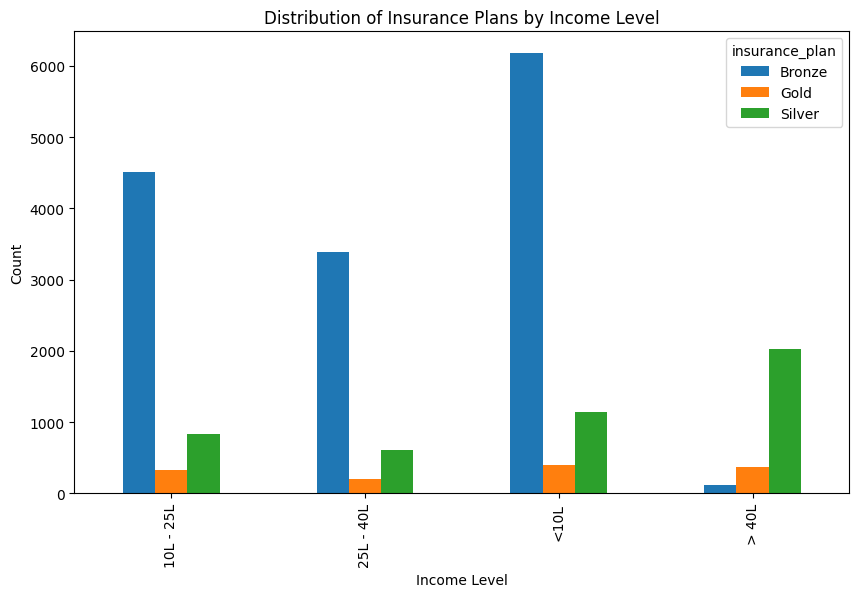

In [ ]:
crosstab.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Insurance Plans by Income Level')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

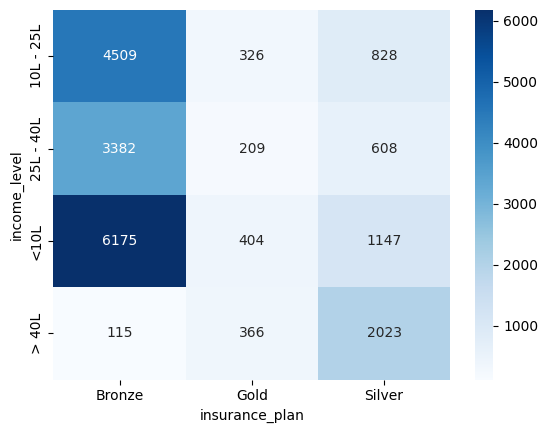

In [ ]:
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='g')

## **Feature Engineering**

Here, we are considering medical history also plays a major role whether person has to be given insurance or not. Let us just give risk_scores to each of the medical condition.

In [ ]:
df.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [ ]:
df['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())

,0,1
0,high blood pressure,None
1,no disease,None
2,no disease,None
3,no disease,None
4,no disease,None
...,...,...
20091,no disease,None
20092,diabetes,None
20093,no disease,None
20094,no disease,None


In [ ]:
df[['disease 1', 'disease 2']] = df['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease 1,disease 2
11627,22,Female,Southwest,Unmarried,1,Underweight,No Smoking,Freelancer,> 40L,50,No Disease,Silver,7189,0,no disease,None
10889,20,Female,Southwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,2,No Disease,Bronze,6853,3,no disease,None
19461,23,Female,Southeast,Unmarried,1,Obesity,No Smoking,Salaried,<10L,4,No Disease,Silver,9505,1,no disease,None
18402,23,Male,Southeast,Unmarried,0,Normal,No Smoking,Self-Employed,<10L,4,No Disease,Silver,9418,2,no disease,None
13045,18,Female,Northwest,Unmarried,1,Normal,Occasional,Freelancer,25L - 40L,31,No Disease,Bronze,3945,0,no disease,None
18294,19,Male,Southeast,Unmarried,2,Normal,Regular,Freelancer,10L - 25L,13,No Disease,Bronze,4968,0,no disease,None
9131,19,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,7,No Disease,Bronze,3577,0,no disease,None
13348,18,Male,Southeast,Unmarried,2,Underweight,Regular,Freelancer,> 40L,56,No Disease,Silver,12944,5,no disease,None
2710,18,Male,Southeast,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,27,No Disease,Bronze,6388,2,no disease,None
19718,20,Male,Southwest,Unmarried,0,Normal,Regular,Salaried,<10L,8,No Disease,Bronze,7815,3,no disease,None


In [ ]:
risk_scores = {
    "diabetes":6,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none":0
}

In [ ]:
df['disease 1'].fillna('none', inplace=True)
df['disease 2'].fillna('none', inplace=True)

df['total_risk_score'] = df['disease 1'].map(risk_scores) + df['disease 2'].map(risk_scores)
df.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease 1,disease 2,total_risk_score
9964,20,Male,Northwest,Unmarried,2,Normal,No Smoking,Freelancer,10L - 25L,22,No Disease,Bronze,7610,4,no disease,none,0
13930,22,Female,Northeast,Unmarried,0,Overweight,No Smoking,Freelancer,25L - 40L,38,No Disease,Bronze,4409,0,no disease,none,0
2665,24,Male,Northeast,Unmarried,1,Underweight,No Smoking,Freelancer,<10L,8,No Disease,Silver,8826,1,no disease,none,0
18009,24,Female,Northwest,Unmarried,1,Overweight,No Smoking,Freelancer,> 40L,88,No Disease,Silver,7838,0,no disease,none,0
11664,18,Female,Northeast,Unmarried,0,Underweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5937,2,no disease,none,0
12285,21,Female,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,10L - 25L,24,No Disease,Bronze,3532,0,no disease,none,0
5459,18,Female,Northwest,Unmarried,0,Normal,No Smoking,Self-Employed,<10L,6,No Disease,Bronze,4854,1,no disease,none,0
10597,25,Male,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,1,No Disease,Bronze,9102,5,no disease,none,0
365,24,Female,Southwest,Unmarried,0,Obesity,Regular,Freelancer,10L - 25L,22,No Disease,Bronze,6010,1,no disease,none,0
68,20,Female,Northeast,Unmarried,0,Underweight,No Smoking,Salaried,<10L,6,No Disease,Bronze,3986,0,no disease,none,0


In [ ]:
#Normalize the total_risk_score column
df['normalized_risk_score'] = (df['total_risk_score'] - df['total_risk_score'].min()) / (df['total_risk_score'].max() - df['total_risk_score'].min())
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease 1,disease 2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [ ]:
df.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

This is ordinal data. We can use label encoding

In [ ]:
df['insurance_plan'] = df['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease 1,disease 2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [ ]:
df.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

This is ordinal data (eg: 3<2<1 or Bachelors<Masters<PhD). So, data will be label encode for this column as well.

In [ ]:
#it can be mapped like this as well
df['income_level'] = df['income_level'].map({'<10L': 1, '10L - 25L' : 2, '25L - 40L' : 3, '> 40L' : 4})

In [ ]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease 1,disease 2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [ ]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df1 = pd.get_dummies(df, columns = nominal_cols, drop_first=True, dtype=int)
df1.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease 1,disease 2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [ ]:
df1.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'disease 1', 'disease 2', 'total_risk_score',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [ ]:
#Now that I have normalized_risk_score, drop the columns related to it like medical_history, disesae 1, disease 2
df1.drop(['medical_history', 'disease 1', 'disease 2','total_risk_score'], axis=1, inplace=True)
df1.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [ ]:
df1.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

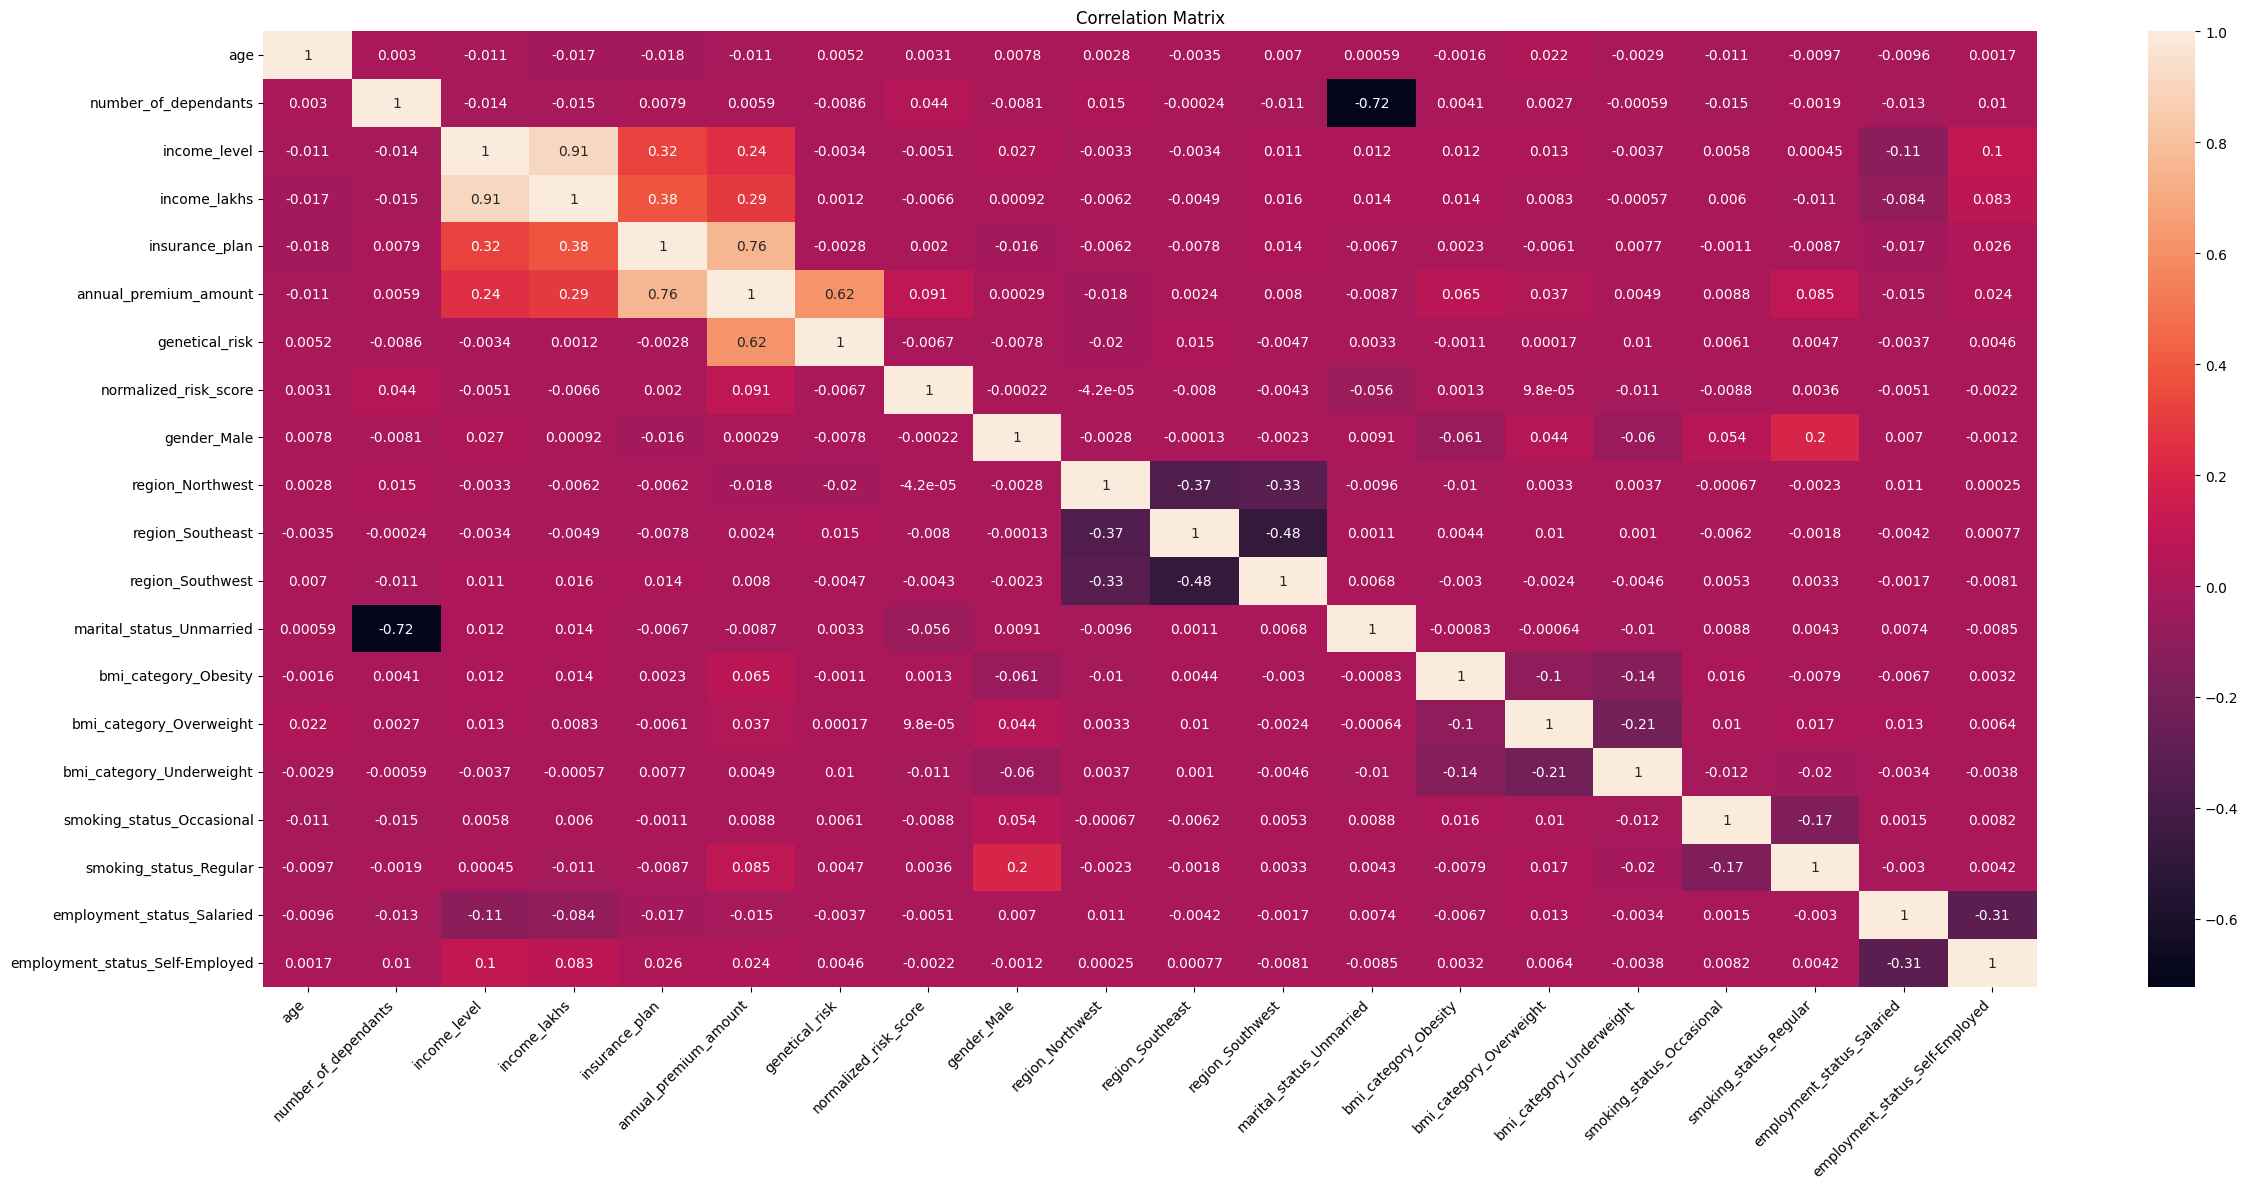

In [ ]:
#Check correlation between the columns
corr = df1.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

With the new data, it is clear that genetical_risk has 62% correlation with annual_premium_amount.

In [ ]:
X = df1.drop('annual_premium_amount', axis=1)
y = df1['annual_premium_amount']

#Scaling the features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()

# Scale the selected columns and update the DataFrame
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale]) # Use cols_to_scale to select the columns to scale
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


A higher Variance Inflation Factor (VIF) indicates that a feature is highly correlated with other features in the dataset. VIF quantifies how much the variance of a feature’s estimated regression coefficient is increased due to multicollinearity (i.e., the correlation between features).

**Key Points:**

* VIF = 1: No correlation between the feature and other features.
* 1 < VIF < 5: Moderate correlation; usually acceptable.
* VIF > 5 (or 10): High correlation, indicating multicollinearity. A feature with a high VIF suggests that it can be predicted by other features, which can make the model unstable.


In feature reduction, features with high VIF values are often considered for removal because they add redundant information.









In [ ]:
# Now apply variance inflation factor
# from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Features'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [ ]:
calculate_vif(X)

,VIF,Features
0,3.154481,age
1,1.930567,number_of_dependants
2,11.927349,income_level
3,11.876295,income_lakhs
4,1.592867,insurance_plan
5,2.981169,genetical_risk
6,1.154462,normalized_risk_score
7,2.311835,gender_Male
8,2.154035,region_Northwest
9,2.990367,region_Southeast


income_level and income_lakhs have high VIF which means they are highly correlated.

In [ ]:
#Let us drop the column income_level (since it has highest VIF) and calculate VIF again
calculate_vif(X.drop('income_level', axis=1))

,VIF,Features
0,3.154481,age
1,1.930567,number_of_dependants
2,11.927349,income_level
3,11.876295,income_lakhs
4,1.592867,insurance_plan
5,2.981169,genetical_risk
6,1.154462,normalized_risk_score
7,2.311835,gender_Male
8,2.154035,region_Northwest
9,2.990367,region_Southeast


Not income_lakhs VIF score also decreased. It is always better to drop column one by one and calculate VIF.

Now that VIF has reduced, drop income_level column

In [ ]:
X_reduced = X.drop('income_level', axis=1)
calculate_vif(X_reduced)

,VIF,Features
0,3.154481,age
1,1.930567,number_of_dependants
2,11.927349,income_level
3,11.876295,income_lakhs
4,1.592867,insurance_plan
5,2.981169,genetical_risk
6,1.154462,normalized_risk_score
7,2.311835,gender_Male
8,2.154035,region_Northwest
9,2.990367,region_Southeast


## **Model Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_train, y_train)

0.9885310615712343

In [ ]:
model_lr.score(X_test, y_test)

0.9881974492712946

In [ ]:
model_lr.coef_, model_lr.intercept_

(array([-2.53807778e+00,  5.29642207e+00, -1.17231188e+01,  7.00312030e+03,
         4.99076260e+03,  1.11465920e+03,  5.95405869e+00,  1.74482189e+00,
         5.87290717e+00,  1.02030482e+01, -6.25277492e+00,  8.07452695e+02,
         4.03057281e+02,  1.06085127e+02,  1.99565595e+02,  6.03959579e+02,
         2.89268298e+00, -4.85407134e-02]),
 3998.59640299489)

The first coefficient belongs to first column name age, second coef belongs to second column etc.

<Axes: xlabel='Coefficient', ylabel='Feature'>

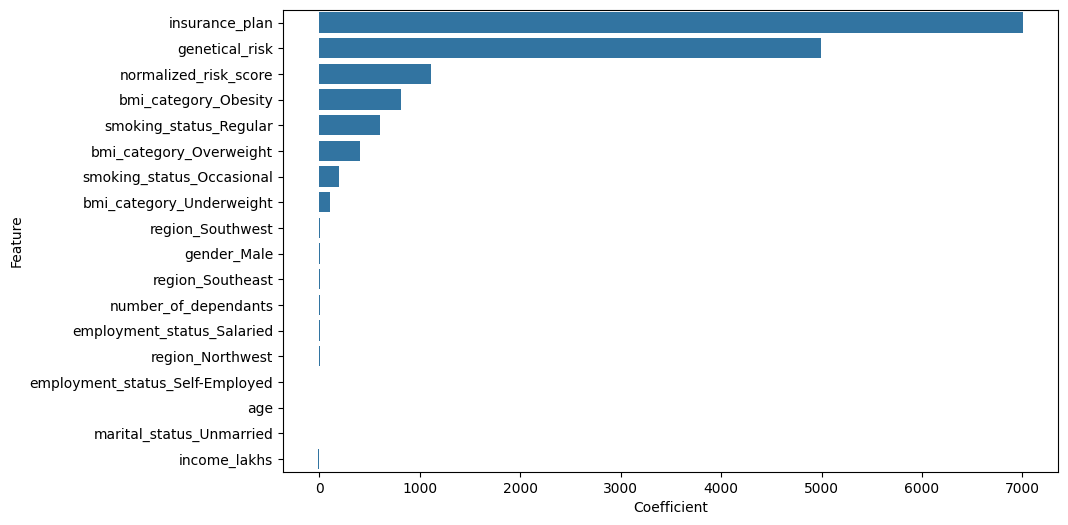

In [ ]:
# Printing these coefficients on a bar chart to check their contribution to final prediction
# Sort the value with highest feature importance and plot
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model_lr.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)

# coefficients = model_lr.coef_
# feature_names = X_reduced.columns

# plt.figure(figsize=(10, 6))
# plt.barh(feature_names, coefficients)
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
# plt.title('Feature Importance')

The model seems to give really good r2 score. But we cannot rely solely on r2 score. Further error analysis is required.

### **Error Analysis**

In [ ]:
best_model  = model_lr
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals, 'Residuals %': residuals_pct})
results_df.head()

,Actual,Predicted,Residuals,Residuals %
8906,8657,8999.205144,342.205144,3.952930
2813,7847,8107.839105,260.839105,3.324061
1606,5833,5810.797219,-22.202781,-0.380641
19366,8835,9009.263532,174.263532,1.972423
15972,6740,6999.501574,259.501574,3.850172


<Axes: xlabel='Residuals %', ylabel='Count'>

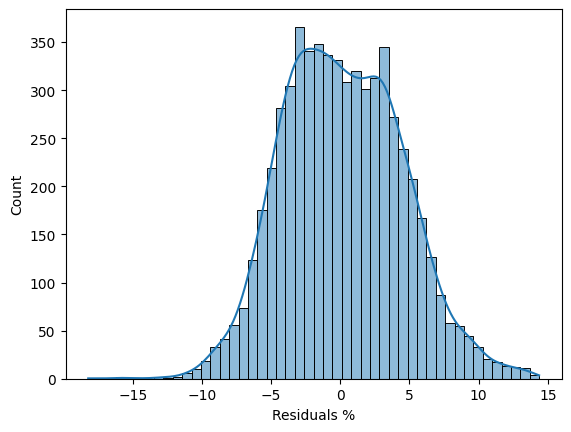

In [ ]:
sns.histplot(results_df['Residuals %'], kde=True)

The error has reduced.

In [ ]:
# Get the recorda that have more than 10% margin of error
error_threshold = 10
high_error_records = results_df[np.abs(results_df['Residuals %']) > error_threshold]
high_error_records.shape

(115, 4)

In [ ]:
# Percentage of these extreme errors
high_error_pct = (high_error_records.shape[0] / results_df.shape[0]) * 100
high_error_pct

1.907763769077638

2% is the error here

In [ ]:
# Check how many records have > 50% error margin
results_df[np.abs(results_df['Residuals %']) > 50].sort_values(by='Residuals %', ascending=False)

,Actual,Predicted,Residuals,Residuals %


No rows are above the error margin>50 which is fabulous.

In [ ]:
### Export the model
import joblib
joblib.dump(best_model, 'model_young.joblib')

['model_young.joblib']

In [ ]:
### We have to export scaler object as we have scaled everything
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale ': cols_to_scale
}
joblib.dump(scaler_with_cols, 'scaler_young.joblib')

['scaler_young.joblib']